In [58]:
import pandas as pd
import geopandas as gpd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set()

In [3]:
def mapas_geosampa(path):
    
    map_geodf = gpd.read_file(path)
    map_geodf.crs = {'init' :'epsg:31983'}
    map_geodf = map_geodf.to_crs(epsg = 4326)
    
    return map_geodf

In [4]:
def dropar_cols_vazias(df):
    
    dropar_cols = []
    for col in df.columns:
        if df[col].isnull().all():
            dropar_cols.append(col)
    df.drop(dropar_cols, axis = 1, inplace = True)

In [5]:
macro_reg = mapas_geosampa('original_data/SIRGAS_SHP_regiao_8/SIRGAS_REGIAO8.shp')

In [6]:
subs = mapas_geosampa('original_data/SIRGAS_SHP_subprefeitura/SIRGAS_SHP_subprefeitura_polygon.shp')

<AxesSubplot:>

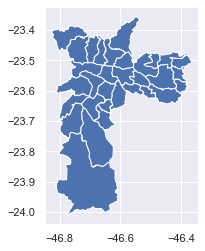

In [7]:
subs.plot()

<AxesSubplot:>

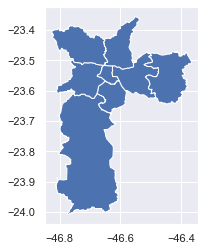

In [8]:
macro_reg.plot()

In [9]:
dados = pd.read_excel('original_data/Planilhão das Metas 23.03.xlsx', sheet_name = 'Proposta 1')
dropar_cols_vazias(dados)

In [10]:
dados['Tipo de regionalização'].unique()

array(['Regionalizada na execução', 'Não regionalizável',
       'Regionalizada no planejamento'], dtype=object)

In [77]:
dados

,Meta,Descrição,Tipo de regionalização,Unidade de medida,TOTAL,Aricanduva/Vila Formosa,Butantã,Campo Limpo,Capela do Socorro,Casa Verde,...,Santo Amaro,São Mateus,São Miguel Paulista,Sapopemba,Sé,Vila Maria/Vila Guilherme,Vila Mariana,Vila Prudente,Localização em definição,OBSERVAÇÕES
0,1,Atender 1.500.000 pessoas em programas de tran...,Regionalizada na execução,Pessoas atendidas,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Implantar o Prontuário Eletrônico em 100% das ...,Regionalizada na execução,Percentual de Unidades Básicas de Saúde com pr...,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Implantar 30 novas unidades de saúde.,Regionalizada na execução,Equipamentos entregues,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Implantar 6 Centros de Referência de Saúde Buc...,Regionalizada na execução,Equipamentos entregues,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Cumprir 100% das metas de cobertura vacinal do...,Não regionalizável,-,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,Atrair R$ 13 bilhões em investimentos para a c...,Não regionalizável,-,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Checar se pode ser regionalizada na execução
71,72,Atingir a arrecadação de R$ 7 bi entre 2021 e ...,Não regionalizável,-,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,73,"Alcançar 7,37 pontos no Índice de Integridade ...",Não regionalizável,-,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,74,Implantar o Portal Único de Licenciamento da c...,Não regionalizável,-,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
regionalizadas = dados[dados['Tipo de regionalização']=='Regionalizada no planejamento'].copy()

In [12]:
regionalizadas.fillna(0, inplace = True)

In [13]:
subs['sp_nome'].sort_values()

11    ARICANDUVA-FORMOSA-CARRAO
14                      BUTANTA
16                  CAMPO LIMPO
18            CAPELA DO SOCORRO
2       CASA VERDE-CACHOEIRINHA
25                CIDADE ADEMAR
20            CIDADE TIRADENTES
5            ERMELINO MATARAZZO
1         FREGUESIA-BRASILANDIA
7                    GUAIANASES
23                     IPIRANGA
6                ITAIM PAULISTA
31                     ITAQUERA
29                    JABAQUARA
26              JACANA-TREMEMBE
8                          LAPA
17                  M'BOI MIRIM
10                        MOOCA
19                  PARELHEIROS
4                         PENHA
21                        PERUS
15                    PINHEIROS
0              PIRITUBA-JARAGUA
27             SANTANA-TUCURUVI
28                  SANTO AMARO
12                   SAO MATEUS
30                   SAO MIGUEL
22                    SAPOPEMBA
9                            SE
3     VILA MARIA-VILA GUILHERME
24                 VILA MARIANA
13      

In [14]:
de_para_subs = {
    'Aricanduva/Vila Formosa' : 'ARICANDUVA-FORMOSA-CARRAO', 
    'Butantã' : 'BUTANTA', 
    'Campo Limpo' : 'CAMPO LIMPO',
    'Capela do Socorro' : 'CAPELA DO SOCORRO', 
    'Casa Verde' : 'CASA VERDE-CACHOEIRINHA', 
    'Cidade Ademar' : 'CIDADE ADEMAR', 
    'Cidade Tiradentes' : 'CIDADE TIRADENTES',
    'Ermelino Matarazzo' : 'ERMELINO MATARAZZO', 
    'Freguesia do Ó/Brasilândia' : 'FREGUESIA-BRASILANDIA', 
    'Guaianases' : 'GUAIANASES',
    'Ipiranga' : 'IPIRANGA', 
    'Itaim Paulista' : 'ITAIM PAULISTA', 
    'Itaquera' : 'ITAQUERA', 
    'Jabaquara' : 'JABAQUARA',
    'Jaçanã/Tremembé' : 'JACANA-TREMEMBE', 
    'Lapa' : 'LAPA', 
    "M'Boi Mirim" : "M'BOI MIRIM", 
    'Mooca' : 'MOOCA', 
    'Parelheiros' : 'PARELHEIROS',
    'Penha' : 'PENHA', 
    'Perus' : 'PERUS', 
    'Pinheiros' : 'PINHEIROS', 
    'Pirituba/Jaraguá' : 'PIRITUBA-JARAGUA', 
    'Santana/Tucuruvi' : 'SANTANA-TUCURUVI',
    'Santo Amaro' : 'SANTO AMARO', 
    'São Mateus' : 'SAO MATEUS', 
    'São Miguel Paulista' : 'SAO MIGUEL', 
    'Sapopemba' : 'SAPOPEMBA', 
    'Sé' : 'SE',
    'Vila Maria/Vila Guilherme' : 'VILA MARIA-VILA GUILHERME', 
    'Vila Mariana' : 'VILA MARIANA', 
    'Vila Prudente' : 'VILA PRUDENTE'
}

In [15]:
id_vars = ['Meta', 'Descrição']

In [16]:
cols_interesse = id_vars + list(de_para_subs.keys()) 

In [17]:
df_dados = regionalizadas[cols_interesse].melt(id_vars = ['Meta', 'Descrição'], value_vars = list(de_para_subs.keys()) )
df_dados = df_dados.rename({'variable' : 'subprefeitura', 'value' : 'valor'}, axis = 1)

In [18]:
df_dados['sub_padronizado'] = df_dados['subprefeitura'].apply(lambda x: de_para_subs[x])

In [25]:
subs.rename({'sp_nome' : 'sub_padronizado'}, axis = 1, inplace = True)

In [38]:
merged = df_dados.merge(subs, how = 'left', on='sub_padronizado')

In [47]:
merged = gpd.GeoDataFrame(merged, geometry = merged['geometry'], crs="EPSG:31983")

In [87]:
def cmap_plot(geodf, col, title, f_name = None, path='mapas_subprefeituras_final', tipo_indicador = 'numérico'):
    
    if not os.path.exists(path):
        os.makedirs(path)
        
    if tipo_indicador == 'numérico':
        legend = True
    else:
        legend = False
    
    ax = geodf.plot(column=col, cmap = 'GnBu',
                legend_kwds={'orientation': "vertical"},
               legend=legend,
               figsize = (10, 15),
                edgecolor = 'black')
    
    plt.axis('off')
    
    fig = ax.get_figure()
    fig.suptitle(title, fontsize=20)
    
    if f_name is None:
        f_name = title+'.png'
    
    fig.savefig(os.path.join(path, f_name))



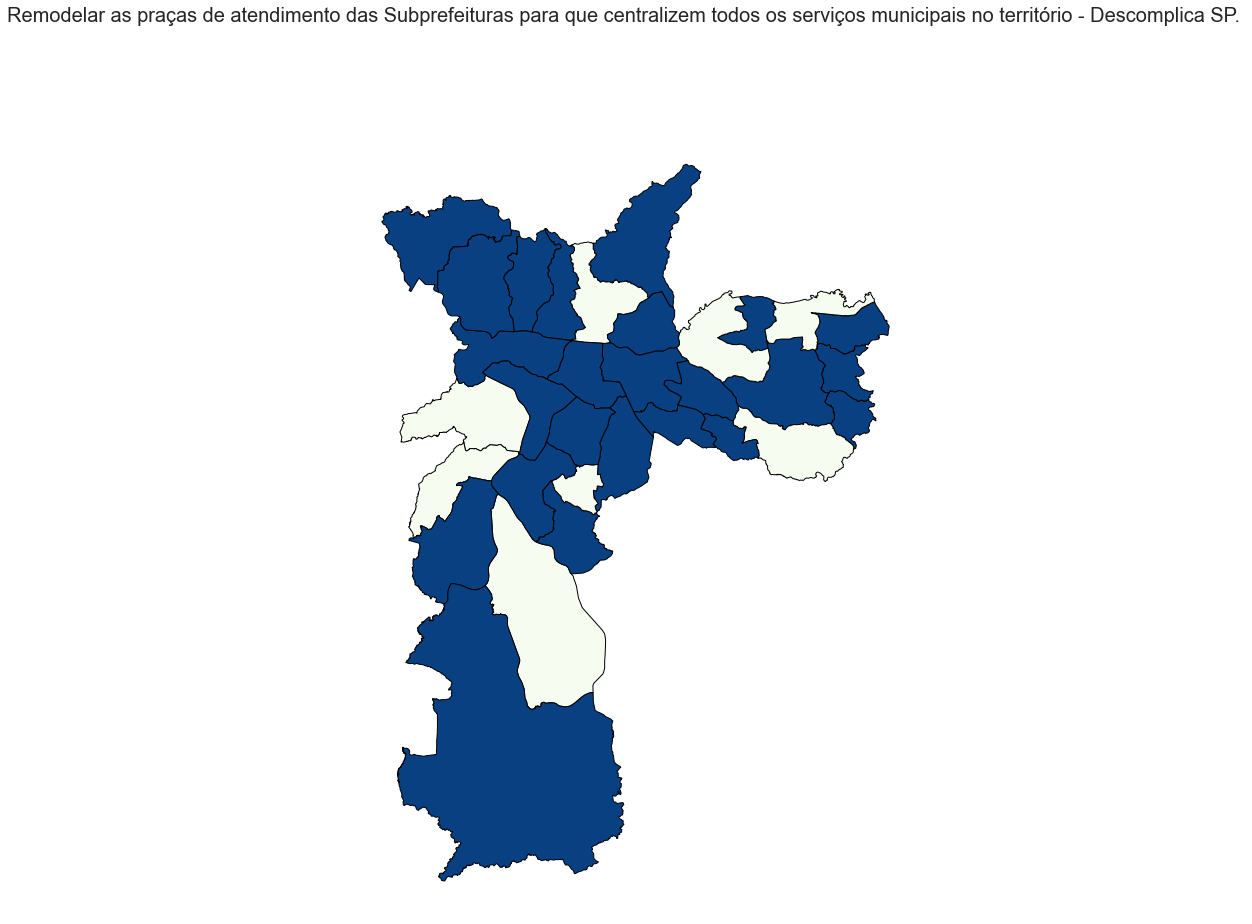

In [88]:
cmap_plot(temp_df, 'valor', nom_meta, tipo_indicador = 'outro')

C:\Users\h-pgy\Anaconda3\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


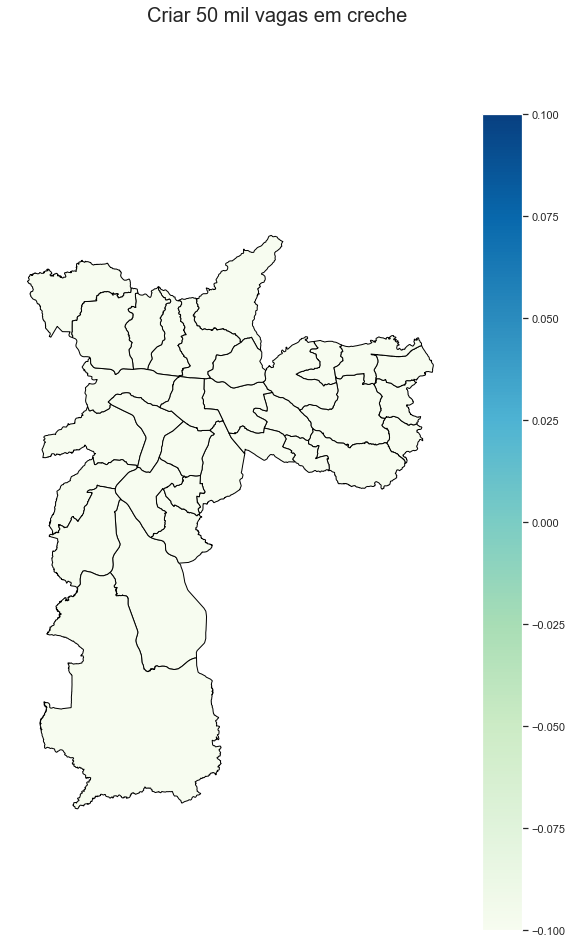

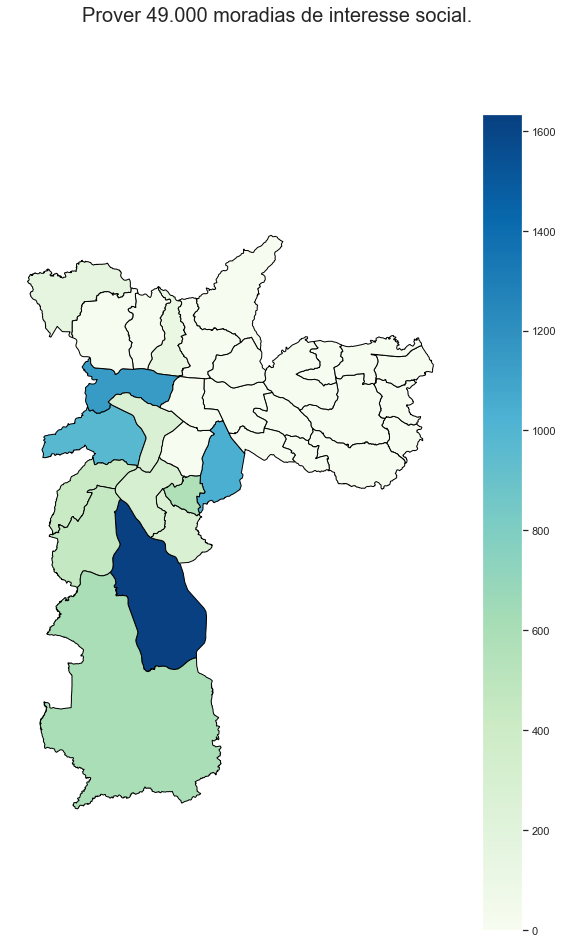

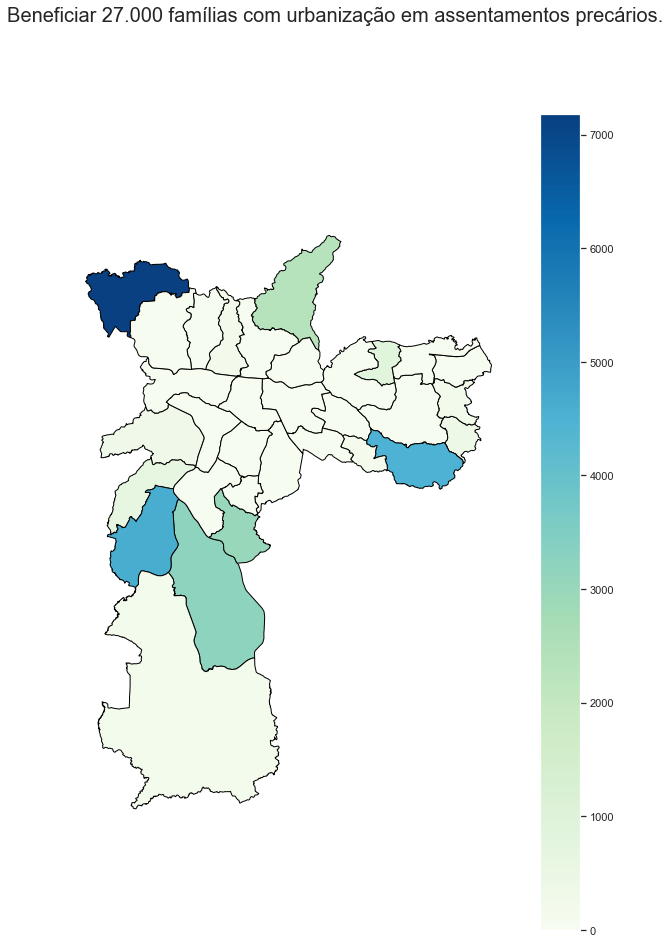

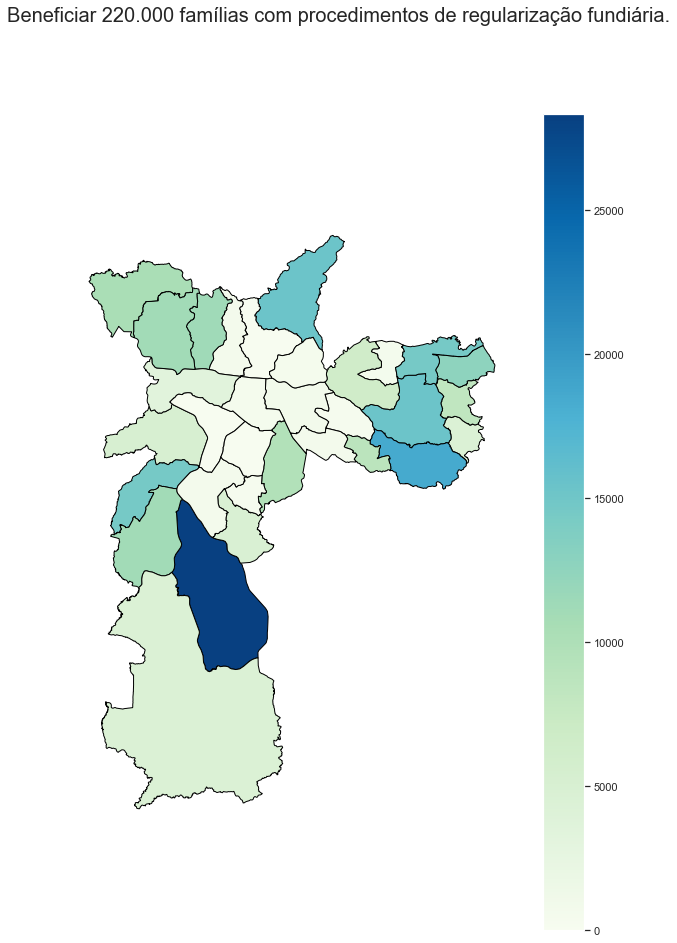

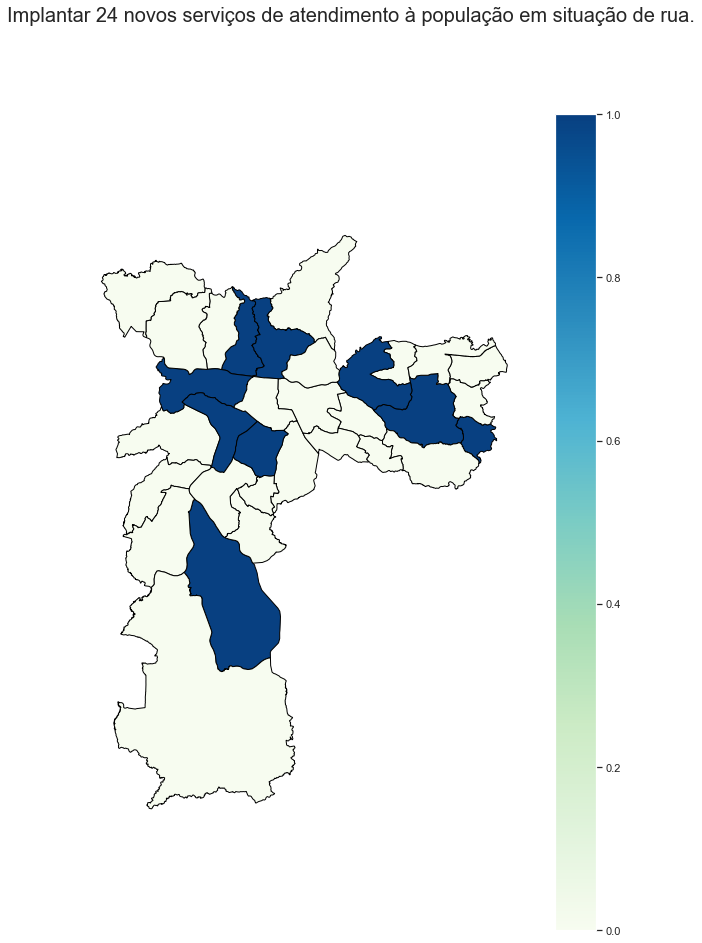

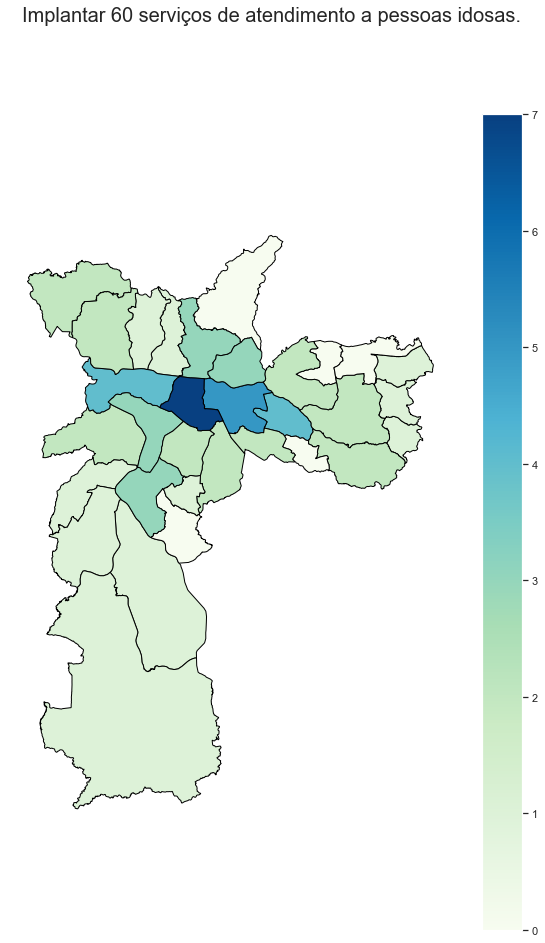

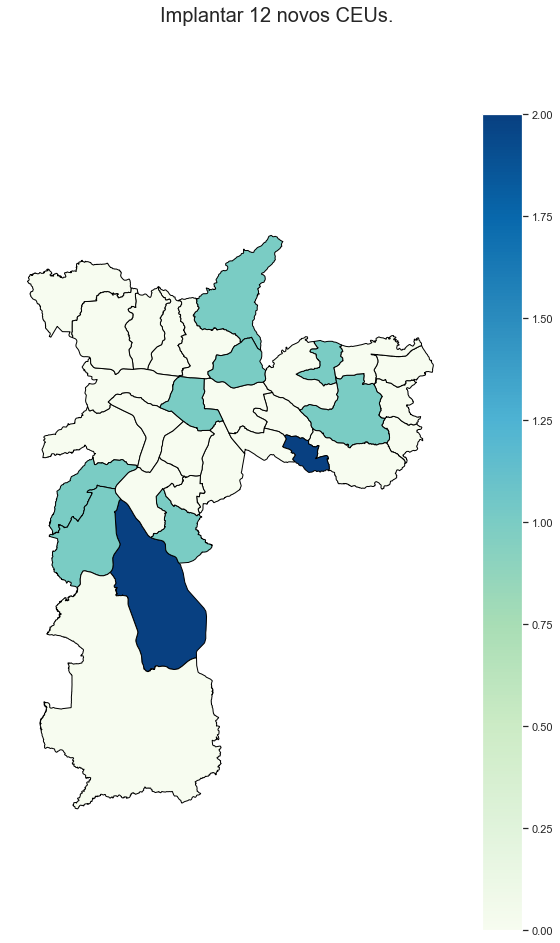

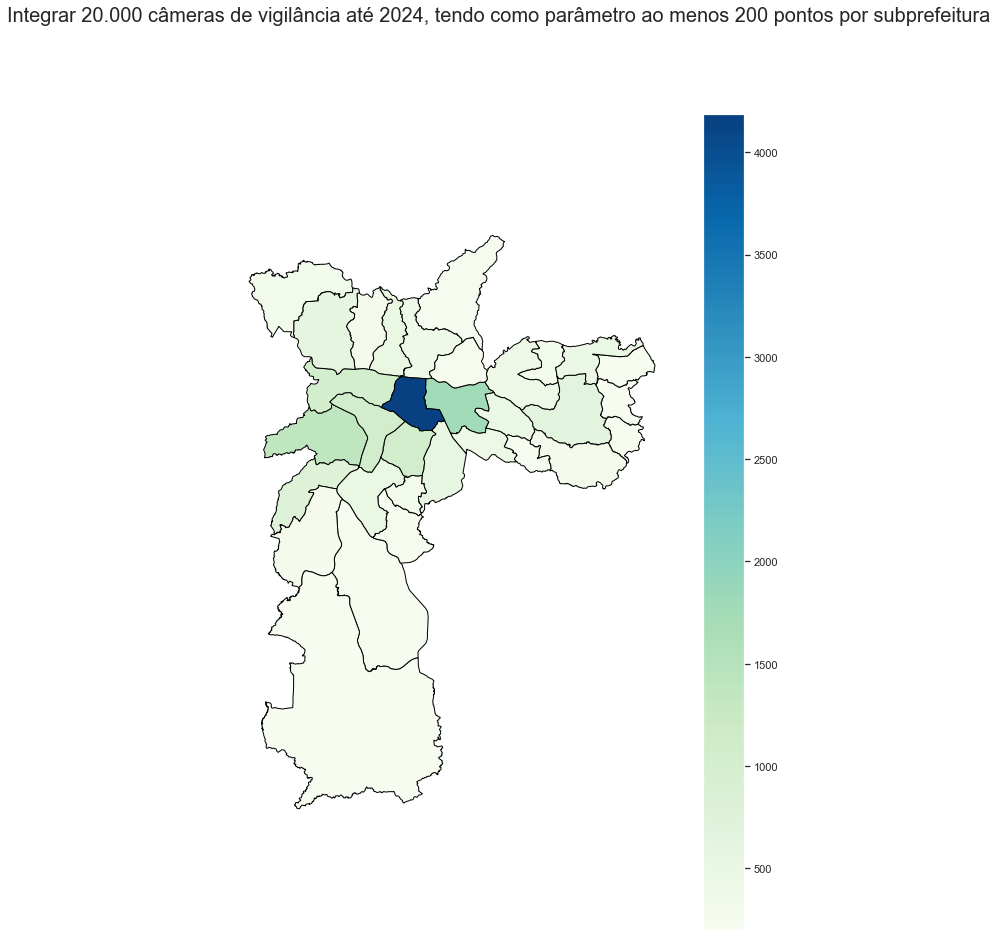

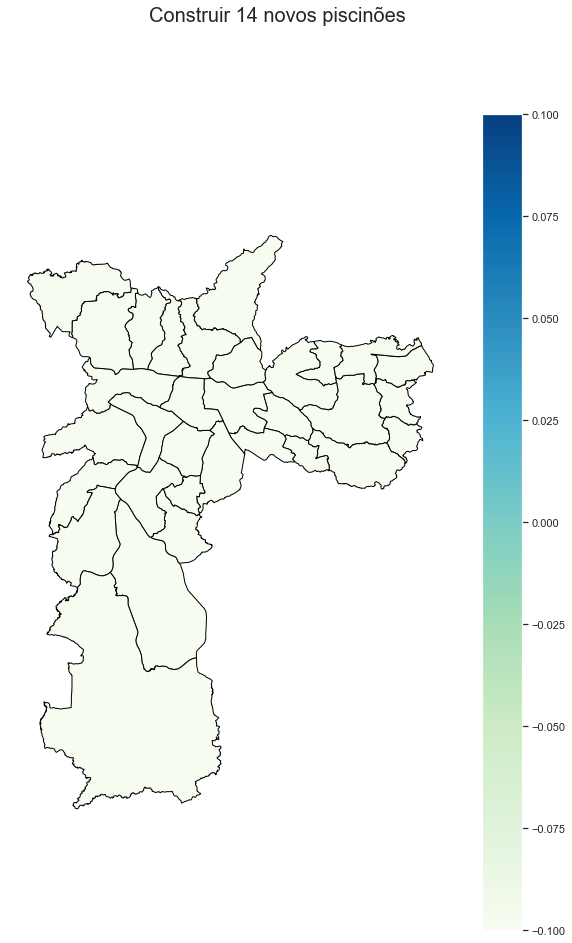

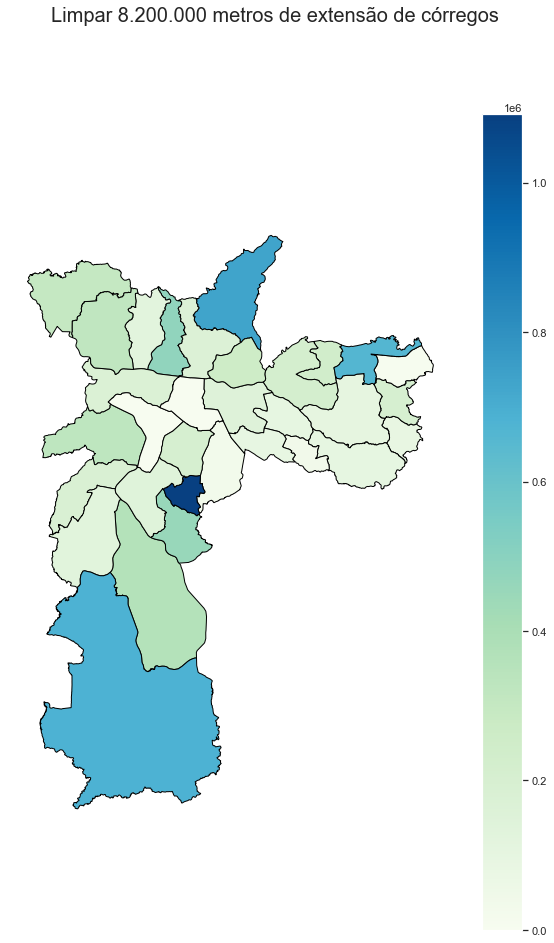

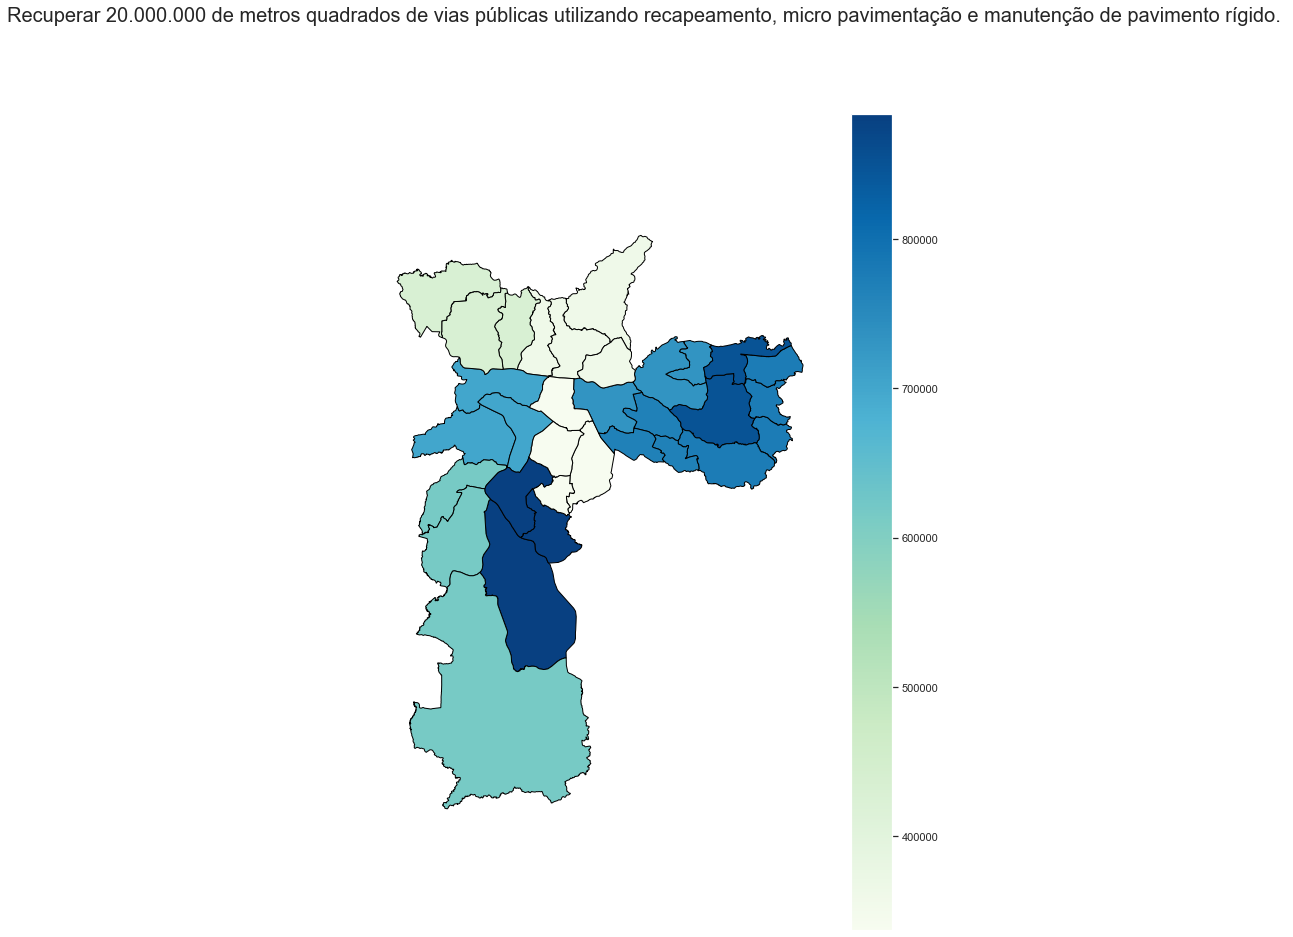

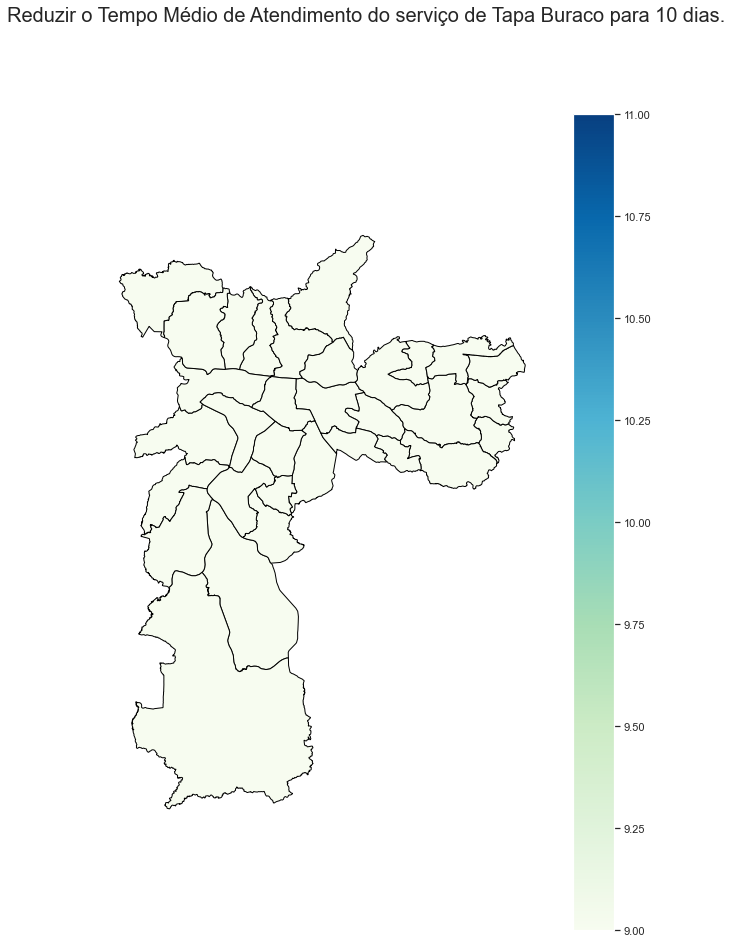

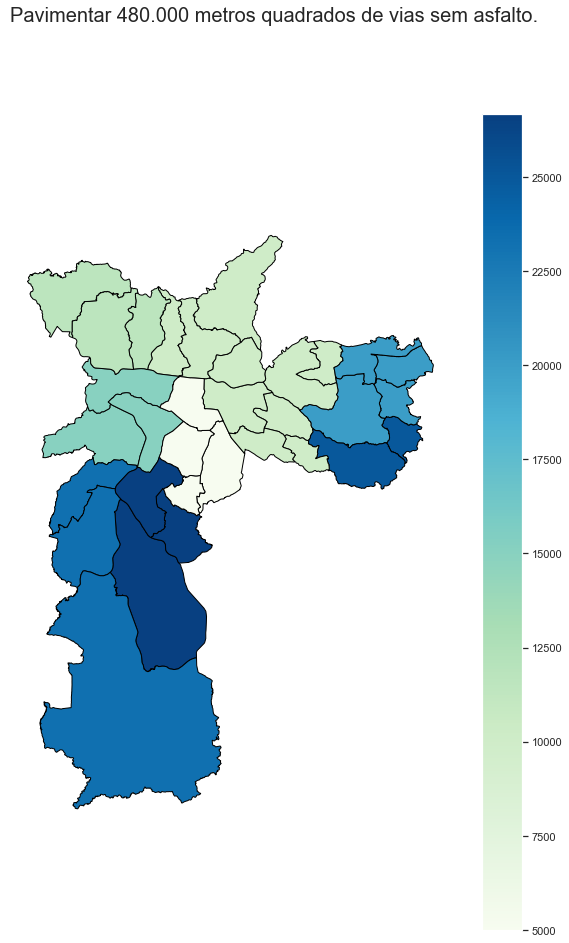

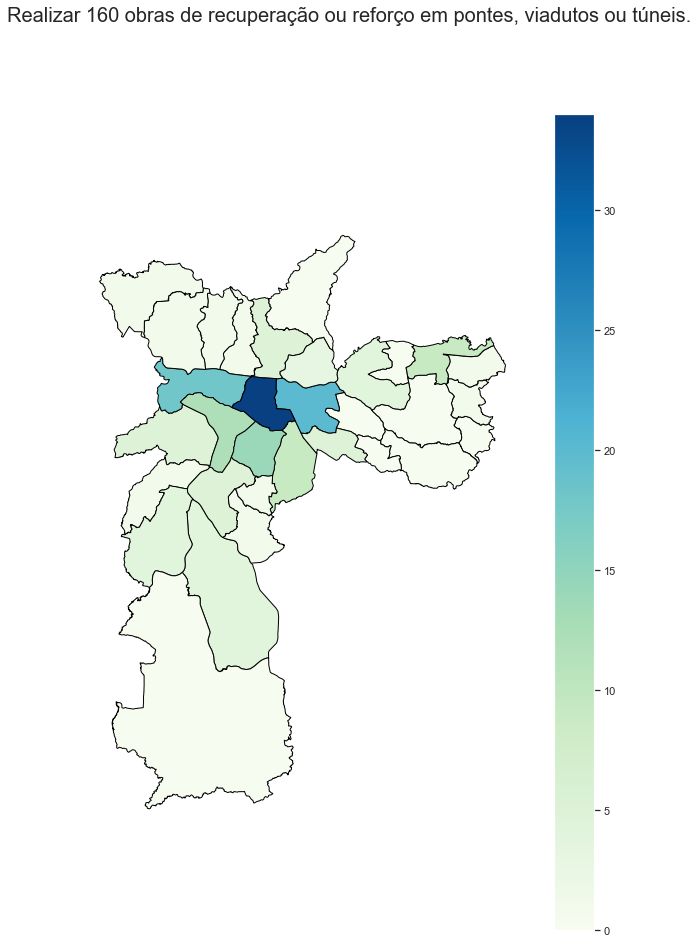

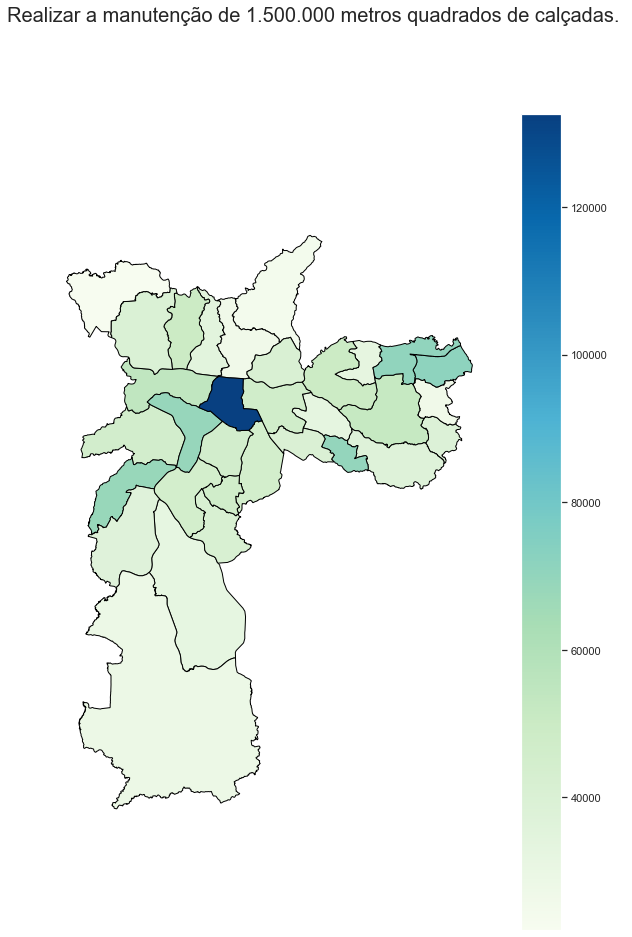

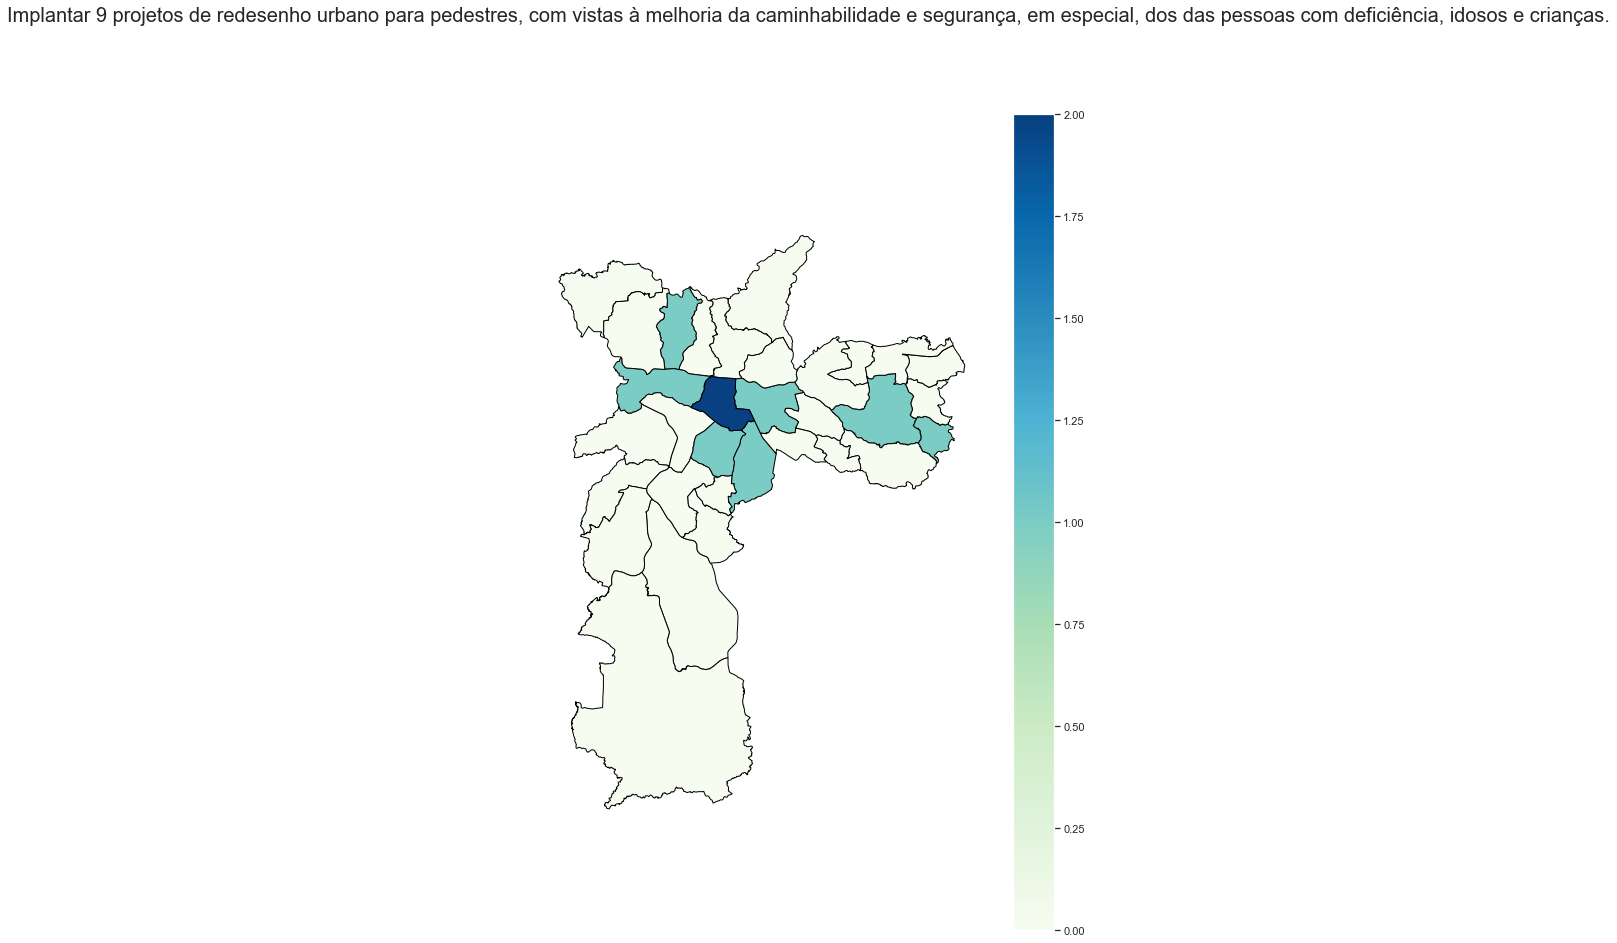

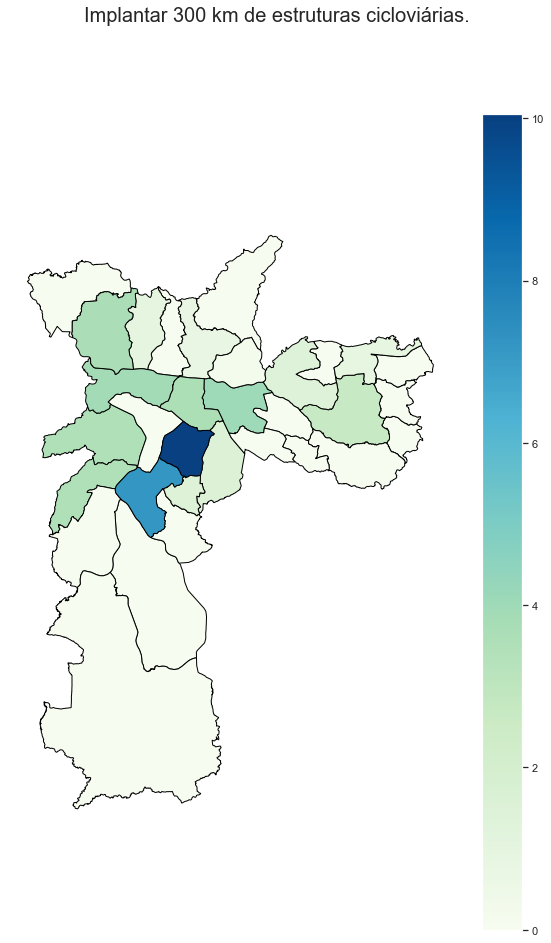

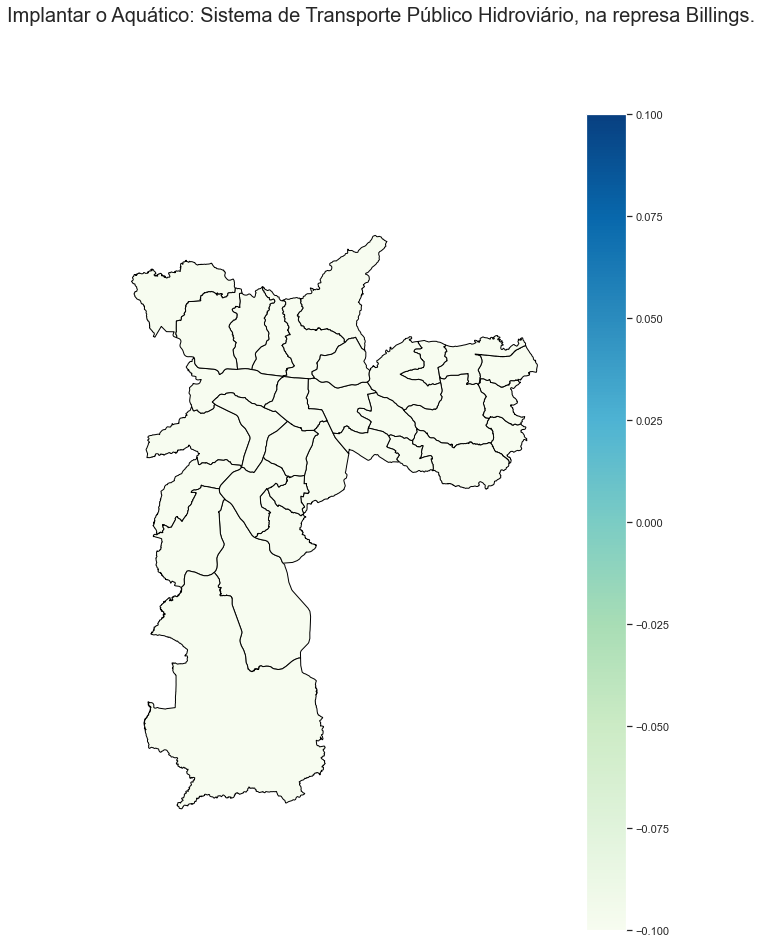

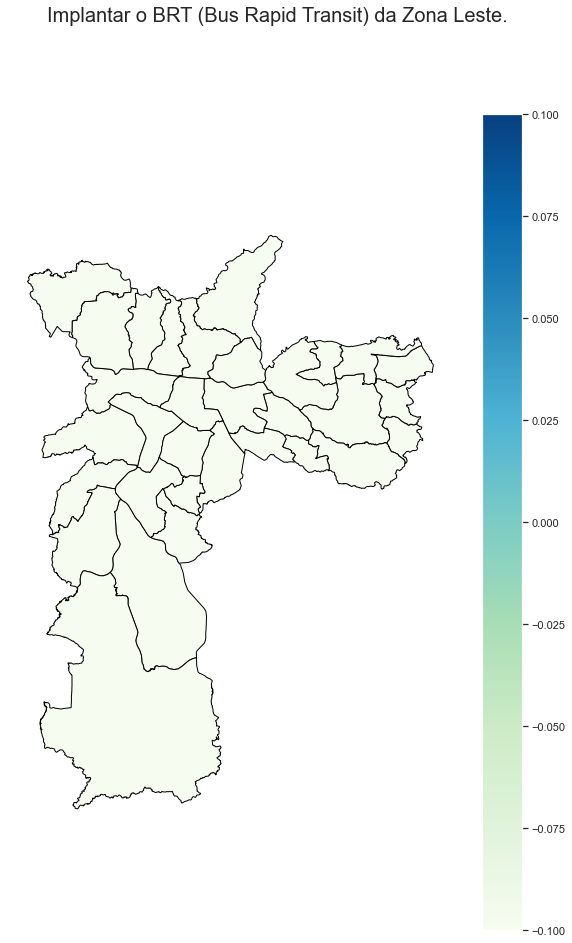

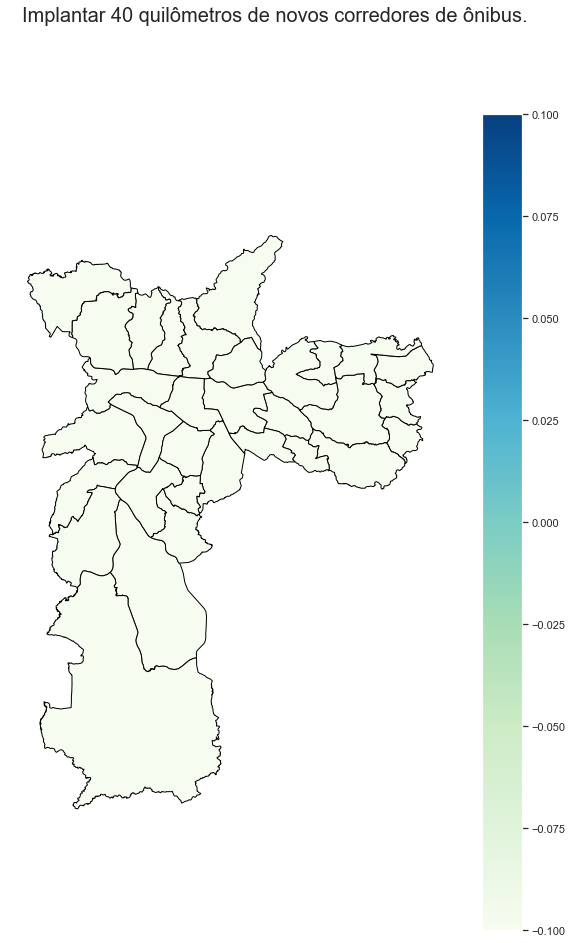

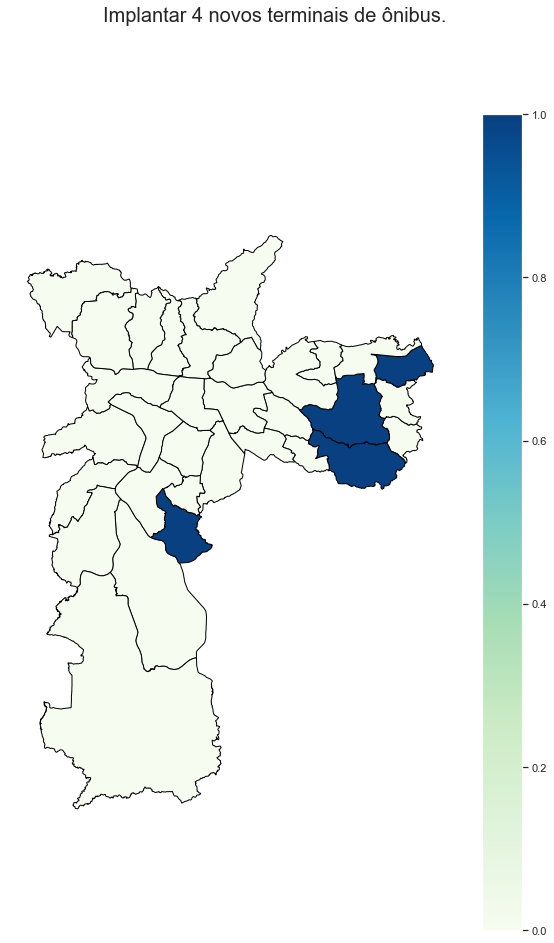

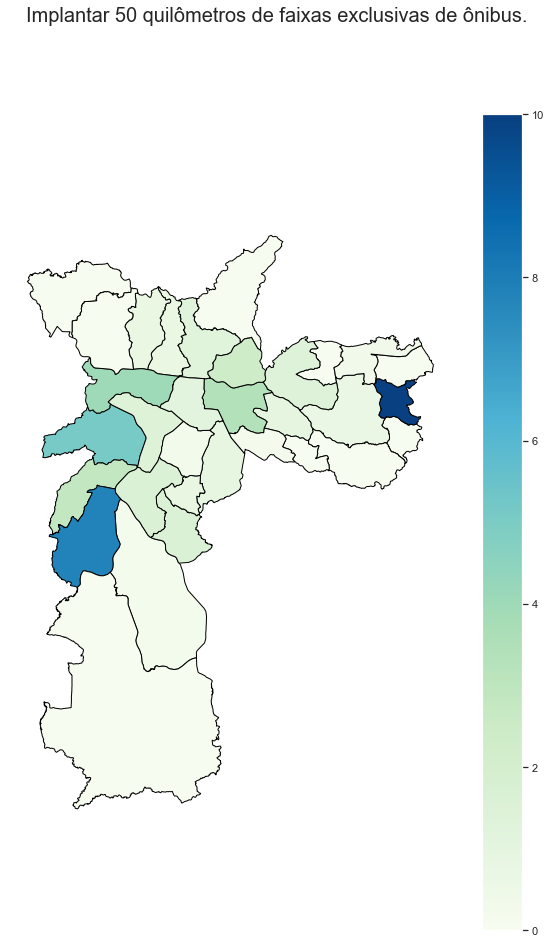

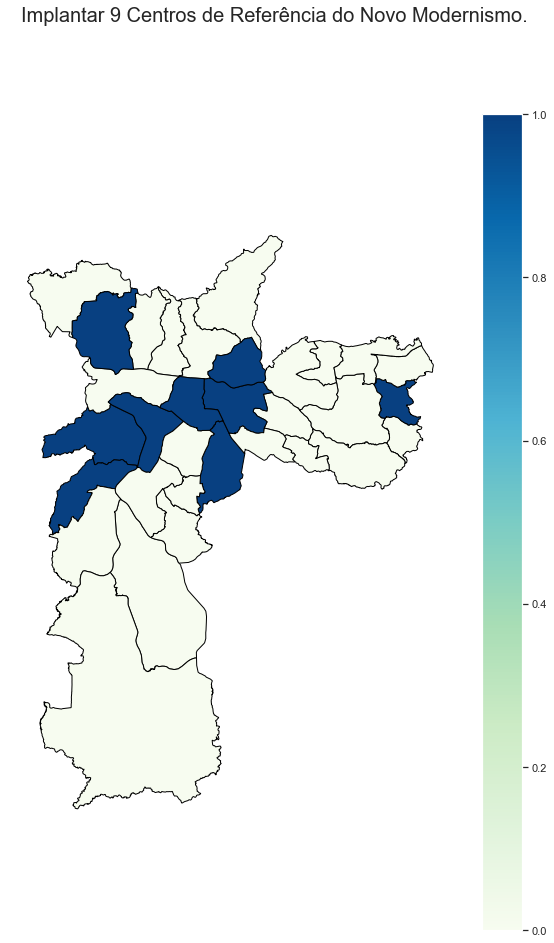

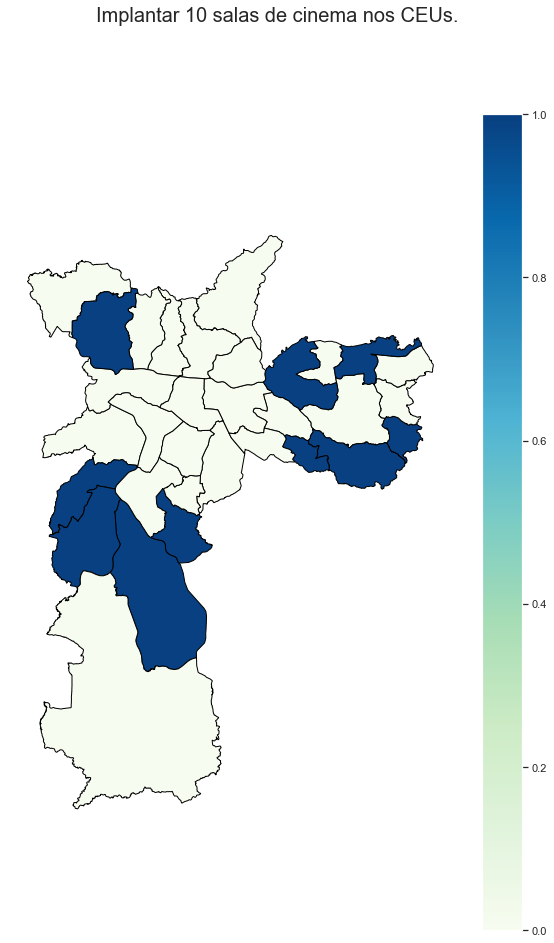

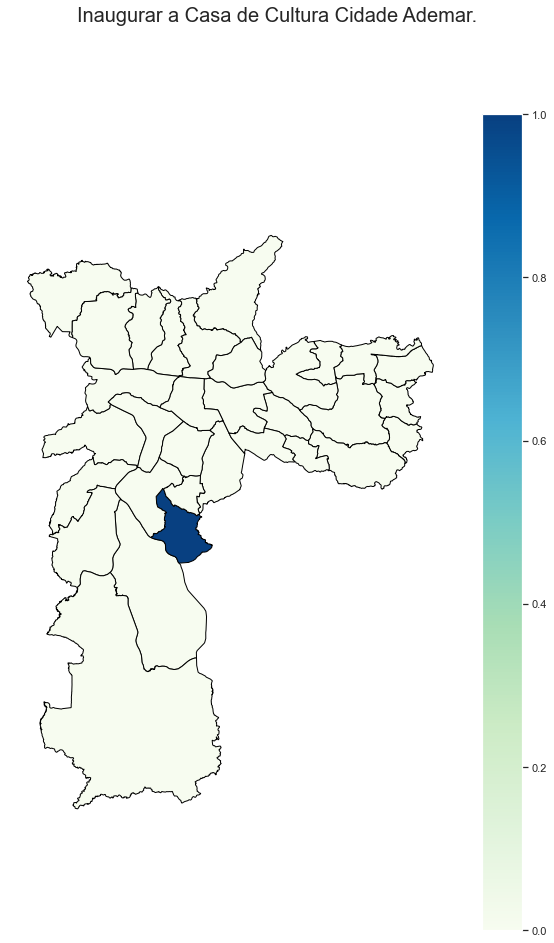

In [ ]:
for meta in merged['Meta'].unique():
    
    temp_df = merged[merged['Meta']==meta]
    nom_meta = temp_df['Descrição'].unique()[0]
    cmap_plot(temp_df, 'valor', nom_meta)

'Remodelar as praças de atendimento das Subprefeituras para que centralizem todos os serviços municipais no território - Descomplica SP. '

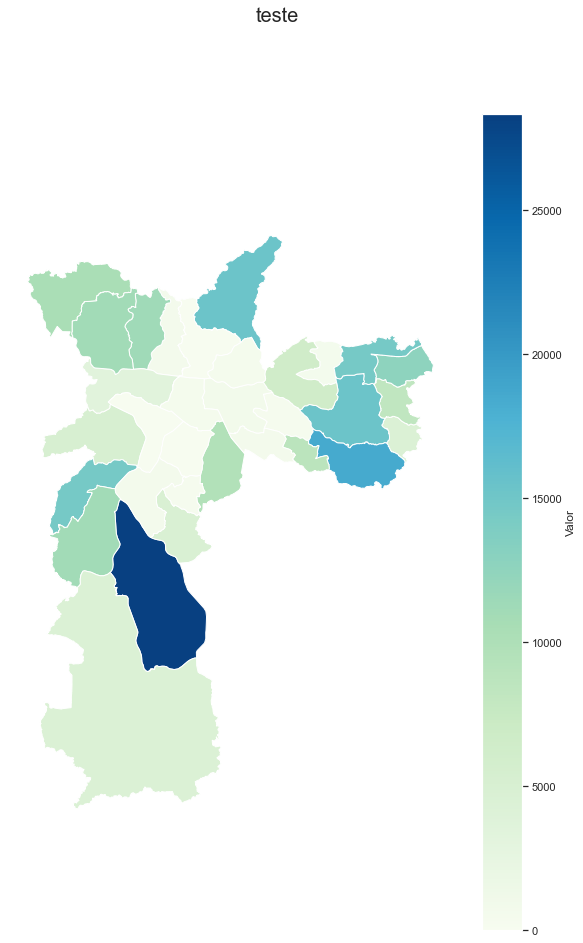

In [70]:
cmap_plot(t, 'valor', 'teste')